In [ ]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


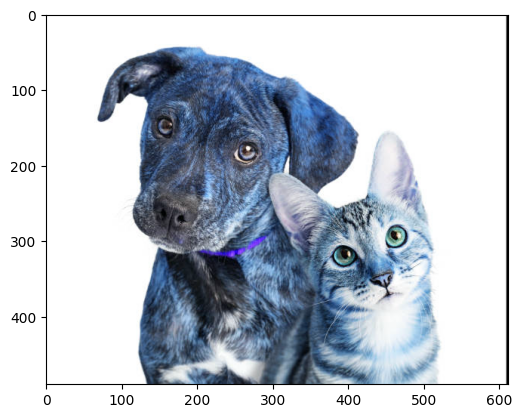

In [ ]:
image=cv2.imread('/content/dogcat.jpg',1)
original_image=image.copy()
plt.imshow(image)


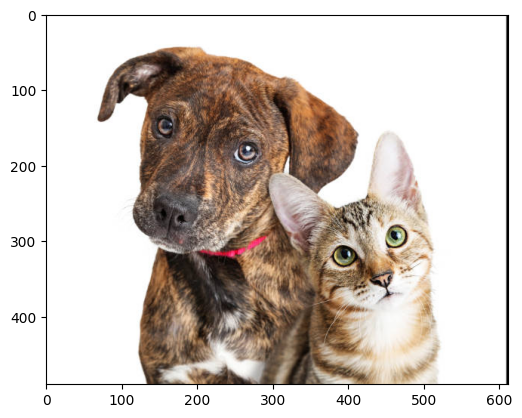

In [ ]:
gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(gray_image)

In [ ]:
classes=[]
with open('coco.names','r') as f:
  classes=[i.strip() for i in f.readlines()]
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
net=cv2.dnn.readNet('yolov3.weights','yolov3.cfg')

In [ ]:
layer_names=net.getLayerNames()
print(layer_names)

('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'leaky_

In [ ]:
output_layer=[layer_names[i-1] for i in net.getUnconnectedOutLayers()]

In [ ]:
output_layer

['yolo_82', 'yolo_94', 'yolo_106']

In [ ]:
height,width,_=gray_image.shape
print(height,width,_)

490 612 3


In [ ]:
blob=cv2.dnn.blobFromImage(gray_image,0.003,(512,512),(0,0,0),True)
blob

array([[[[0.765, 0.765, 0.765, ..., 0.675, 0.18 , 0.   ],
         [0.765, 0.765, 0.765, ..., 0.675, 0.18 , 0.   ],
         [0.765, 0.765, 0.765, ..., 0.675, 0.18 , 0.   ],
         ...,
         [0.765, 0.765, 0.765, ..., 0.675, 0.18 , 0.   ],
         [0.765, 0.765, 0.765, ..., 0.675, 0.18 , 0.   ],
         [0.765, 0.765, 0.765, ..., 0.675, 0.18 , 0.   ]],

        [[0.765, 0.765, 0.765, ..., 0.675, 0.18 , 0.   ],
         [0.765, 0.765, 0.765, ..., 0.675, 0.18 , 0.   ],
         [0.765, 0.765, 0.765, ..., 0.675, 0.18 , 0.   ],
         ...,
         [0.765, 0.765, 0.765, ..., 0.675, 0.18 , 0.   ],
         [0.765, 0.765, 0.765, ..., 0.675, 0.18 , 0.   ],
         [0.765, 0.765, 0.765, ..., 0.675, 0.18 , 0.   ]],

        [[0.765, 0.765, 0.765, ..., 0.675, 0.18 , 0.   ],
         [0.765, 0.765, 0.765, ..., 0.675, 0.18 , 0.   ],
         [0.765, 0.765, 0.765, ..., 0.675, 0.18 , 0.   ],
         ...,
         [0.765, 0.765, 0.765, ..., 0.675, 0.18 , 0.   ],
         [0.765, 0.765, 0.

In [ ]:
net.setInput(blob)
outs=net.forward(output_layer)

In [ ]:
print(outs)
# contains three array for three output layer in each array  it contains:
# Bounding Box Coordinates:
# The (x, y) coordinates of the top-left corner of the bounding box.
# The width and height of the bounding box.

# Confidence Scores:
# Confidence scores for each detected object. These scores indicate how certain the model is about the correctness of each detection.

# Class Probabilities:
# Probabilities for each class, indicating the likelihood that the detected object belongs to a particular class.
#
#

(array([[0.03125  , 0.03125  , 0.2265625, ..., 0.25     , 0.25     ,
        0.25     ],
       [0.03125  , 0.03125  , 0.3046875, ..., 0.25     , 0.25     ,
        0.25     ],
       [0.03125  , 0.03125  , 0.7285156, ..., 0.25     , 0.25     ,
        0.25     ],
       ...,
       [0.96875  , 0.96875  , 0.2265625, ..., 0.25     , 0.25     ,
        0.25     ],
       [0.96875  , 0.96875  , 0.3046875, ..., 0.25     , 0.25     ,
        0.25     ],
       [0.96875  , 0.96875  , 0.7285156, ..., 0.25     , 0.25     ,
        0.25     ]], dtype=float32), array([[0.015625  , 0.015625  , 0.05859375, ..., 0.25      , 0.25      ,
        0.25      ],
       [0.015625  , 0.015625  , 0.12109375, ..., 0.25      , 0.25      ,
        0.25      ],
       [0.015625  , 0.015625  , 0.11523438, ..., 0.25      , 0.25      ,
        0.25      ],
       ...,
       [0.984375  , 0.984375  , 0.05859375, ..., 0.25      , 0.25      ,
        0.25      ],
       [0.984375  , 0.984375  , 0.12109375, ..., 0.25 

[16]
[0.7297489643096924]
[[41, 44, 358, 437]]
[16, 16]
[0.7297489643096924, 0.969660758972168]
[[41, 44, 358, 437], [77, 57, 341, 413]]
[16, 16, 16]
[0.7297489643096924, 0.969660758972168, 0.9167959094047546]
[[41, 44, 358, 437], [77, 57, 341, 413], [84, 46, 399, 436]]
[16, 16, 16, 16]
[0.7297489643096924, 0.969660758972168, 0.9167959094047546, 0.5503349900245667]
[[41, 44, 358, 437], [77, 57, 341, 413], [84, 46, 399, 436], [81, 46, 481, 433]]
[16, 16, 16, 16, 16]
[0.7297489643096924, 0.969660758972168, 0.9167959094047546, 0.5503349900245667, 0.8696412444114685]
[[41, 44, 358, 437], [77, 57, 341, 413], [84, 46, 399, 436], [81, 46, 481, 433], [92, 69, 314, 419]]
[16, 16, 16, 16, 16, 16]
[0.7297489643096924, 0.969660758972168, 0.9167959094047546, 0.5503349900245667, 0.8696412444114685, 0.8067290186882019]
[[41, 44, 358, 437], [77, 57, 341, 413], [84, 46, 399, 436], [81, 46, 481, 433], [92, 69, 314, 419], [93, 65, 389, 431]]
[16, 16, 16, 16, 16, 16, 16]
[0.7297489643096924, 0.96966075897

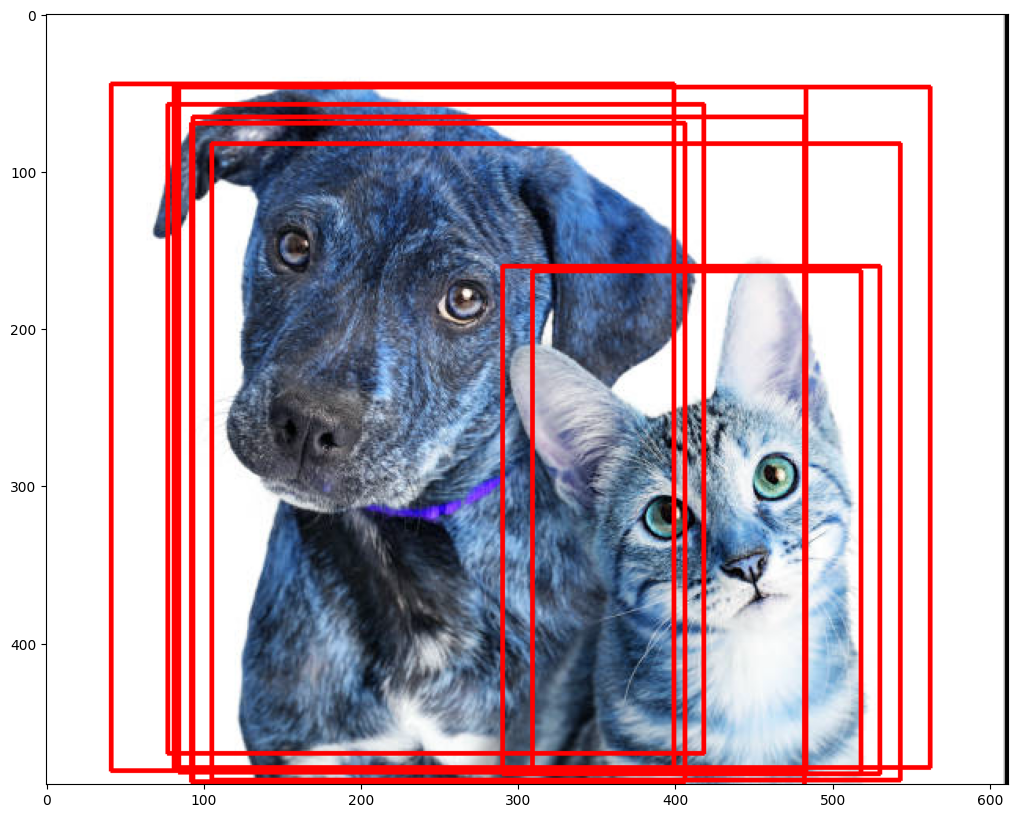

In [ ]:
class_ids=[] # This list is intended to store the predicted class IDs for detected objects. In the context of object detection, each object detected by the model is assigned a class ID, indicating the type of object it belongs to (e.g., person, car, etc.)
boxes=[] #This list is used to store the bounding box coordinates for the detected objects. A bounding box typically includes the (x, y) coordinates of the top-left corner and the (width, height) of the box.
confidences=[]#This list is meant to store the confidence scores associated with the detected objects.

for out in outs:
  for det in out:
    scores=det[5:] # 4th samma coordinates 5 the dekho confidence ko value return garney bhayera  # Extract confidence scores
    class_id=np.argmax(scores) # maximum argumnet bhako ko  index return garxa # Find the class with the maximum confidence
    confidence=scores[class_id] ## Get the confidence score for the detected class
    if confidence>0.5:
      # Calculate bounding box coordinates and dimensions in pixel values
      cx=int(det[0]*width) # x-coordinate of the centre of the boundary box
      cy=int(det[1]*height)#y-coordinate of the centre of the boundary box
      w=int(det[2]*width)
      h=int(det[3]*height)
      x = int(cx - w / 2)
      y=int(cy - h / 2)
      boxes.append([x, y, w, h])
      confidences.append(float(confidence))
      class_ids.append(class_id)
      print(class_ids)
      print(confidences)
      print(boxes)
      cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
plt.figure(figsize = (20,10))

plt.imshow(image)



In [ ]:
import numpy as np

arr = np.array([2, 5, 1, 8, 4])

# Find the index of the maximum value in the array
max_index = np.argmax(arr)
print(max_index)

3


9
[1 8]
77 57 341 413
dog
290 160 240 323
cat


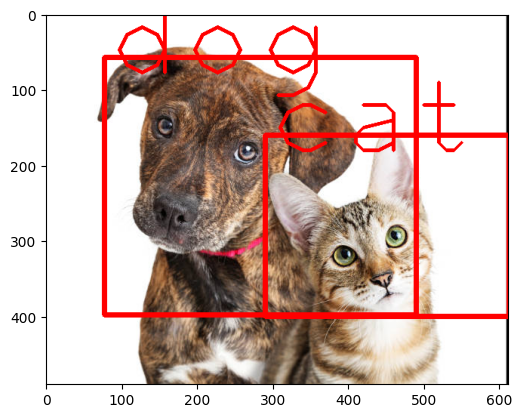

In [ ]:
n_det = len(boxes)
print(n_det)
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.3)
print(indexes)
for i in range(n_det):
    if i in indexes:
        x, y, w, h = boxes[i]
        print(x, y, w, h)
        label = str(classes[class_ids[i]])
        print(label)
        cv2.rectangle(gray_image, (x, y), (x+h, y+w), (255, 0, 0), 5)
        cv2.putText(gray_image, label, (x, y+30), cv2.FONT_HERSHEY_PLAIN, 10, (255, 0, 0), 4)

plt.imshow(gray_image)


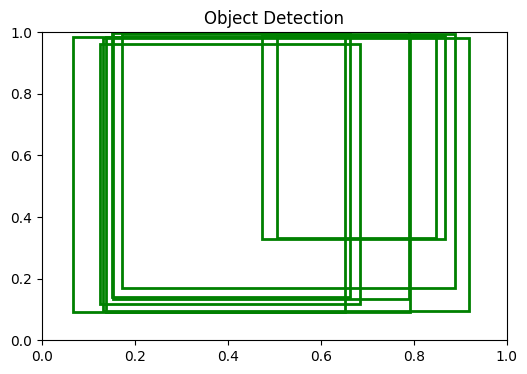